In [ ]:
# Guanxiao Chen
# 1005717841
# INF2178
# Assignment 3

In [17]:
import pandas as pd

# 2. Data Cleaning
# Load the dataset
from google.colab import drive
drive.mount('/drive', force_remount=True)
df = pd.read_csv('./INF2178_A3_data.csv')

# Display DataFrame's information
print('Data Overview:')
print(df.info())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values:")
print(missing_values)

# Dispaly the cleaned DataFrame
print('\nCleaned Data Overview:')
print(df.info())

Mounted at /drive
Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB
None

Missing values:
fallreadingscore               0
fallmathscore                  0
fallgeneralknowledgescore      0
springreadingscore             0
springmathscore

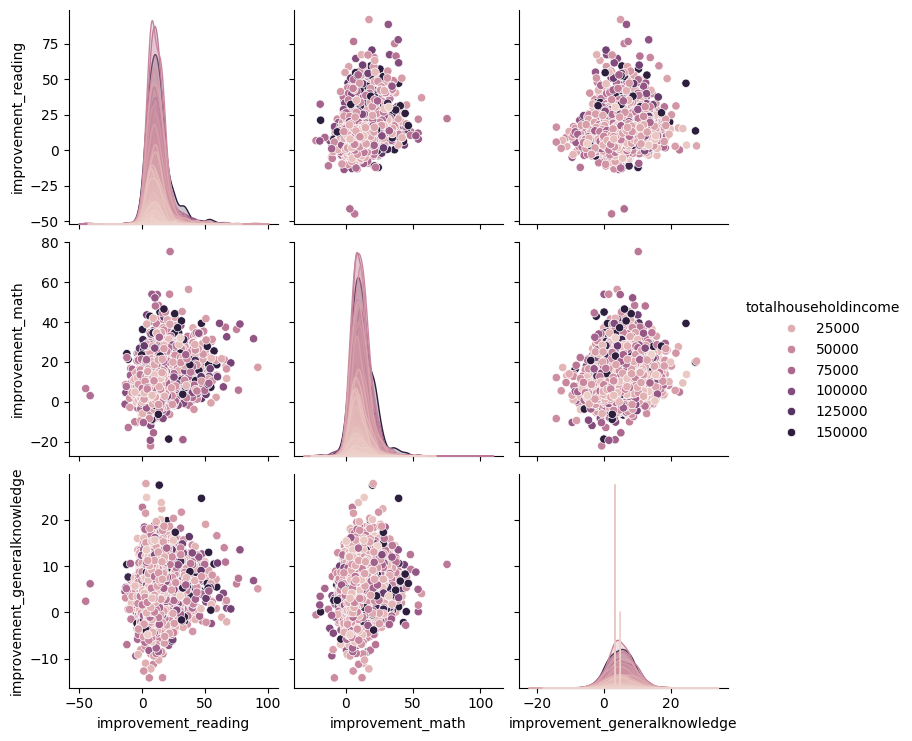

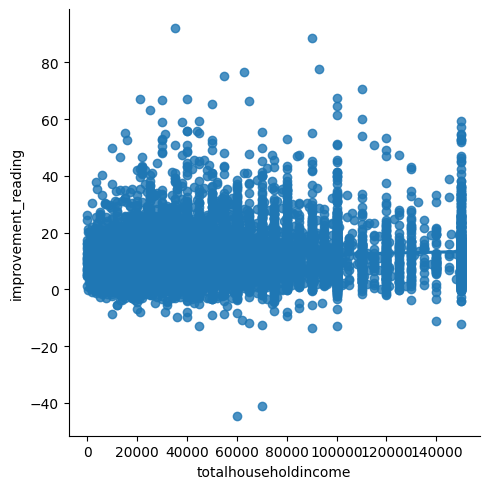

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Levene’s test for homogeneity of variance: stat=nan, p=nan

ANOVA results for reading:
                              sum_sq       df          F    PR(>F)
C(incomegroup)           230.611199      2.0   1.775743  0.169402
totalhouseholdincome    1130.725900      1.0  17.413538  0.000030
Residual              774594.435176  11929.0        NaN       NaN

ANOVA results for math:
                              sum_sq       df          F        PR(>F)
C(incomegroup)           538.101117      2.0   5.792105  3.060142e-03
totalhouseholdincome    2189.346016      1.0  47.132112  6.964940e-12
Residual              554117.086720  11929.0        NaN           NaN

ANOVA results for general knowledge:
                              sum_sq       df         F    PR(>F)
C(incomegroup)            74.276726      2.0  2.259048  0.104495
totalhouseholdincome      30.576150      1.0  1.859883  0.172664
Residual              196110.715032  11929.0       NaN       NaN


<ipython-input-16-8b6080b22533>:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='incomegroup', y='improvement_reading', data=df, ci=None)


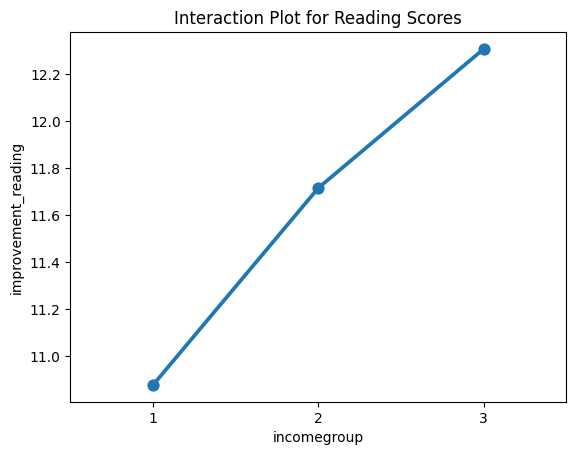

<ipython-input-16-8b6080b22533>:57: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='incomegroup', y='improvement_math', data=df, ci=None)


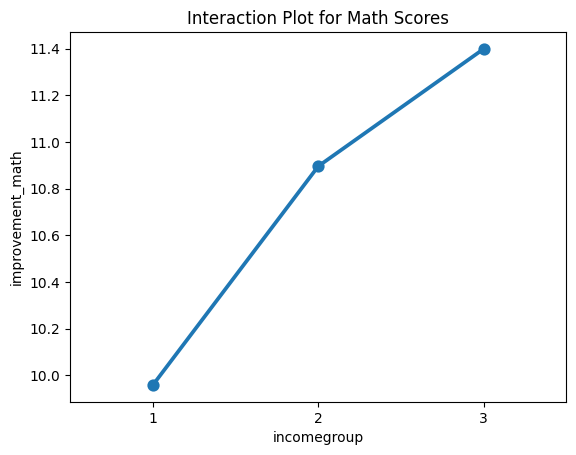

<ipython-input-16-8b6080b22533>:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='incomegroup', y='improvement_generalknowledge', data=df, ci=None)


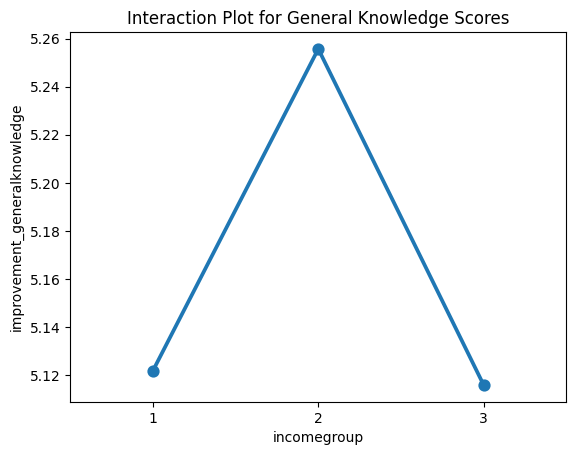

Tukey's HSD Test for Reading Scores:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     1      2   0.8387    0.0 0.4246 1.2527   True
     1      3   1.4301    0.0 1.0079 1.8523   True
     2      3   0.5915 0.0053 0.1458 1.0371   True
--------------------------------------------------

Tukey's HSD Test for Math Scores:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     1      2   0.9377    0.0 0.5871 1.2883   True
     1      3   1.4406    0.0 1.0831 1.7982   True
     2      3    0.503 0.0051 0.1256 0.8803   True
--------------------------------------------------

Tukey's HSD Test for General Knowledge Scores:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1  

In [16]:
# 3. Impact of Household Income
# Research Question 1: How does total household income influence the improvement in reading, math, and general knowledge scores from fall to spring among kindergarten students?

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('./INF2178_A3_data.csv')

# Calculate the improvement scores first
df['improvement_reading'] = df['springreadingscore'] - df['fallreadingscore']
df['improvement_math'] = df['springmathscore'] - df['fallmathscore']
df['improvement_generalknowledge'] = df['springgeneralknowledgescore'] - df['fallgeneralknowledgescore']

# Exploratory Data Analysis (EDA)
sns.pairplot(df[['improvement_reading', 'improvement_math', 'improvement_generalknowledge', 'totalhouseholdincome']], hue='totalhouseholdincome')
plt.show()

# Checking assumptions for ANCOVA:
# 1. Linearity
sns.lmplot(x='totalhouseholdincome', y='improvement_reading', data=df)
plt.show()

# 2. Homogeneity of variances (Levene's Test)
from scipy.stats import levene
stat, p = levene(df['improvement_reading'][df['incomegroup'] == 'Low'],
                 df['improvement_reading'][df['incomegroup'] == 'Medium'],
                 df['improvement_reading'][df['incomegroup'] == 'High'])
print(f'Levene’s test for homogeneity of variance: stat={stat}, p={p}')

# ANCOVA
# Reading Score
model_reading = ols('improvement_reading ~ C(incomegroup) + totalhouseholdincome', data=df).fit()
anova_reading = sm.stats.anova_lm(model_reading, typ=2)
print('\nANOVA results for reading:\n', anova_reading)

# Math Score
model_math = ols('improvement_math ~ C(incomegroup) + totalhouseholdincome', data=df).fit()
anova_math = sm.stats.anova_lm(model_math, typ=2)
print('\nANOVA results for math:\n', anova_math)

# General Knowledge Score
model_gk = ols('improvement_generalknowledge ~ C(incomegroup) + totalhouseholdincome', data=df).fit()
anova_gk = sm.stats.anova_lm(model_gk, typ=2)
print('\nANOVA results for general knowledge:\n', anova_gk)

# Interaction Plots
# Reading Score
sns.pointplot(x='incomegroup', y='improvement_reading', data=df, ci=None)
plt.title('Interaction Plot for Reading Scores')
plt.show()

# Math Score
sns.pointplot(x='incomegroup', y='improvement_math', data=df, ci=None)
plt.title('Interaction Plot for Math Scores')
plt.show()

# General Knowledge Score
sns.pointplot(x='incomegroup', y='improvement_generalknowledge', data=df, ci=None)
plt.title('Interaction Plot for General Knowledge Scores')
plt.show()

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD post hoc test for Reading Scores
tukey_reading = pairwise_tukeyhsd(endog=df['improvement_reading'], groups=df['incomegroup'], alpha=0.05)
print("Tukey's HSD Test for Reading Scores:")
print(tukey_reading)

# Perform Tukey's HSD post hoc test for Math Scores
tukey_math = pairwise_tukeyhsd(endog=df['improvement_math'], groups=df['incomegroup'], alpha=0.05)
print("\nTukey's HSD Test for Math Scores:")
print(tukey_math)

# Perform Tukey's HSD post hoc test for General Knowledge Scores
tukey_gk = pairwise_tukeyhsd(endog=df['improvement_generalknowledge'], groups=df['incomegroup'], alpha=0.05)
print("\nTukey's HSD Test for General Knowledge Scores:")
print(tukey_gk)


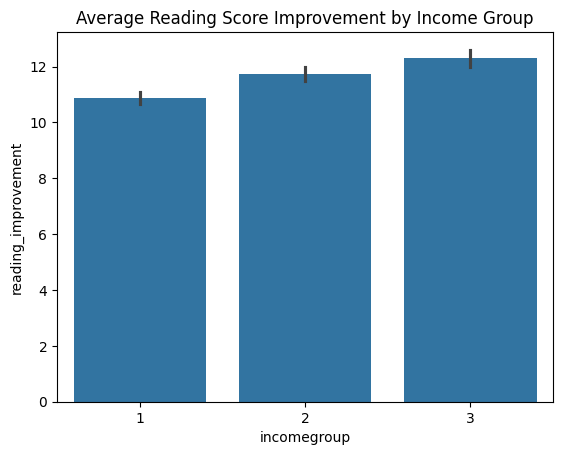

ANOVA results for reading_improvement:
                       sum_sq       df          F        PR(>F)
C(incomegroup)    4237.396064      2.0  32.583792  7.718776e-15
Residual        775725.161077  11930.0        NaN           NaN


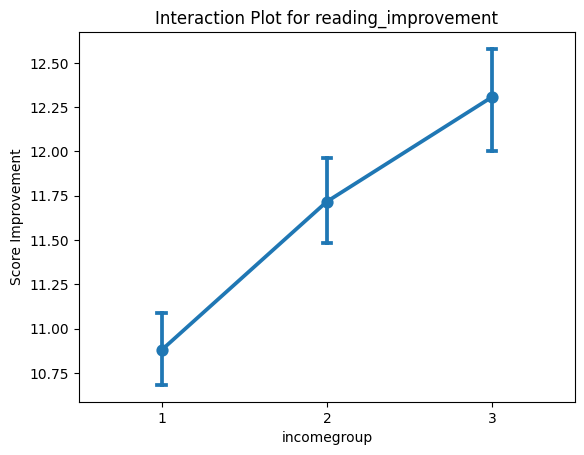

Post hoc test (Tukey's HSD) for reading_improvement:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     1      2   0.8387    0.0 0.4246 1.2527   True
     1      3   1.4301    0.0 1.0079 1.8523   True
     2      3   0.5915 0.0053 0.1458 1.0371   True
--------------------------------------------------


ANOVA results for math_improvement:
                       sum_sq       df          F        PR(>F)
C(incomegroup)    4433.575871      2.0  47.539051  2.728277e-21
Residual        556306.432737  11930.0        NaN           NaN


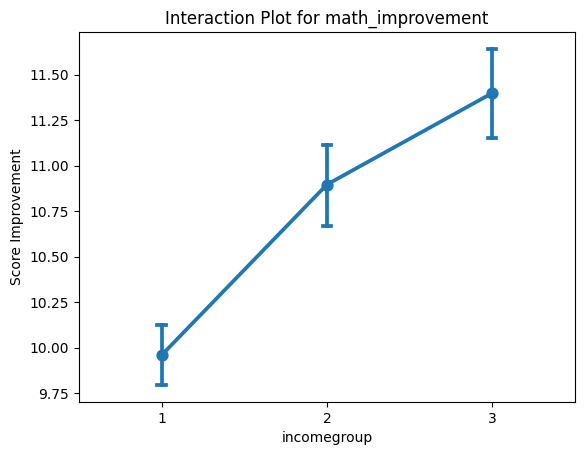

Post hoc test (Tukey's HSD) for math_improvement:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     1      2   0.9377    0.0 0.5871 1.2883   True
     1      3   1.4406    0.0 1.0831 1.7982   True
     2      3    0.503 0.0051 0.1256 0.8803   True
--------------------------------------------------


ANOVA results for gk_improvement:
                       sum_sq       df         F    PR(>F)
C(incomegroup)      47.768209      2.0  1.452715  0.233976
Residual        196141.291181  11930.0       NaN       NaN


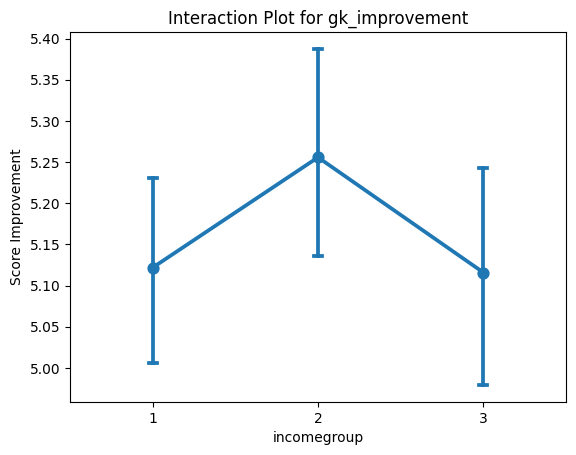

Post hoc test (Tukey's HSD) for gk_improvement:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.1339 0.2873 -0.0743 0.3421  False
     1      3  -0.0059 0.9976 -0.2182 0.2064  False
     2      3  -0.1399  0.309 -0.3639 0.0842  False
---------------------------------------------------




In [18]:
# 4. Evaluating Socioeconomic Disparities
# Research Question 2: Are there significant differences in the academic performance growth of kindergarten students from various income groups?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the dataset
df = pd.read_csv('./INF2178_A3_data.csv')

# Calculate the improvement scores for each subject area
df['reading_improvement'] = df['springreadingscore'] - df['fallreadingscore']
df['math_improvement'] = df['springmathscore'] - df['fallmathscore']
df['gk_improvement'] = df['springgeneralknowledgescore'] - df['fallgeneralknowledgescore']

# Exploratory Data Analysis (EDA)
# Visualize the average improvements by income group
sns.barplot(data=df, x='incomegroup', y='reading_improvement')
plt.title('Average Reading Score Improvement by Income Group')
plt.show()

# One-way ANOVA
improvement_measures = ['reading_improvement', 'math_improvement', 'gk_improvement']
for measure in improvement_measures:
    # ANOVA
    model = ols(f'{measure} ~ C(incomegroup)', data=df).fit()
    anova_results = sm.stats.anova_lm(model, typ=2)
    print(f'ANOVA results for {measure}:')
    print(anova_results)

    # Interaction Plot
    sns.pointplot(data=df, x='incomegroup', y=measure, capsize=.05)
    plt.title(f'Interaction Plot for {measure}')
    plt.ylabel('Score Improvement')
    plt.show()

    # Post hoc test - Tukey's HSD
    print(f"Post hoc test (Tukey's HSD) for {measure}:")
    tukey_results = pairwise_tukeyhsd(endog=df[measure], groups=df['incomegroup'], alpha=0.05)
    print(tukey_results)
    print("\n")

